In [5]:
# perform 2D FFT on images and visualize

import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2
from skimage.transform import hough_line, hough_line_peaks
data_format = "*.tif"

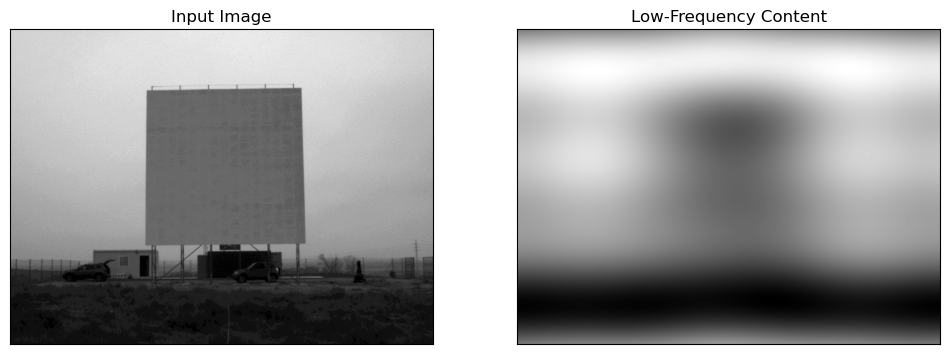

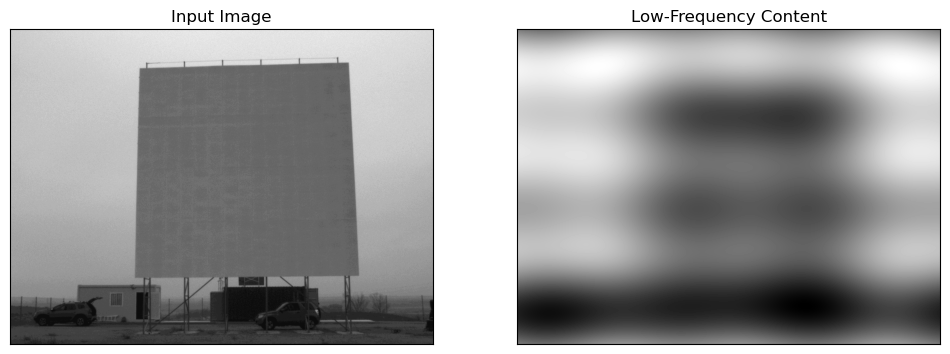

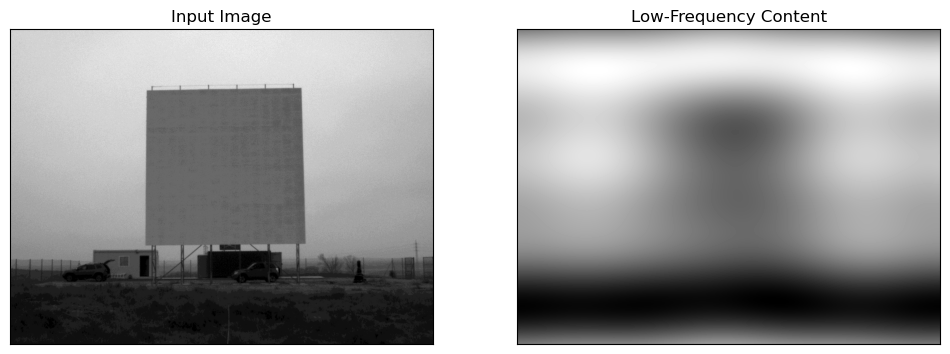

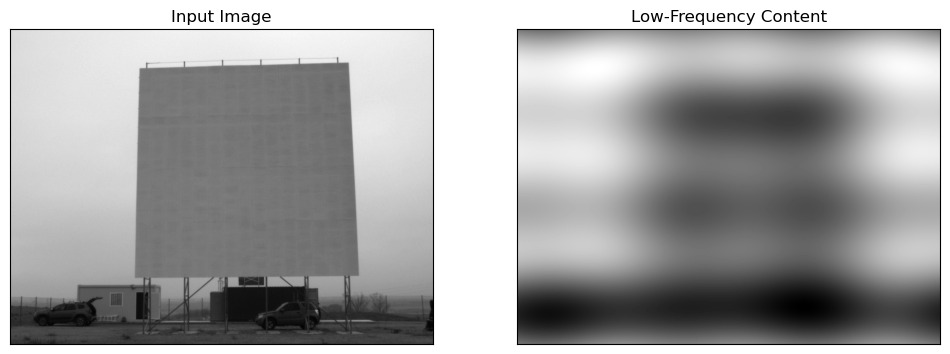

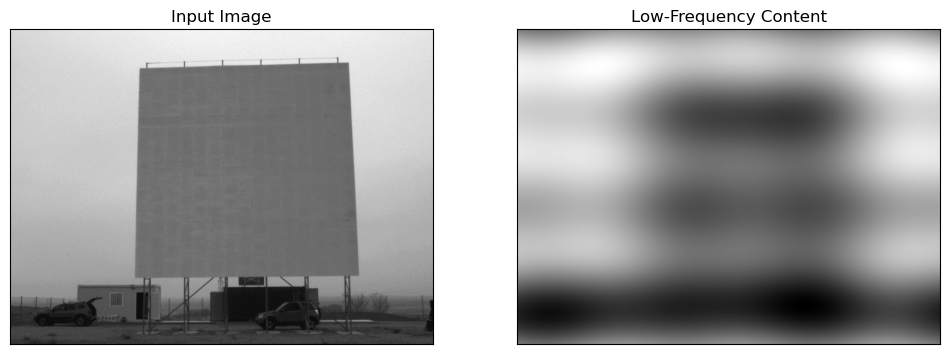

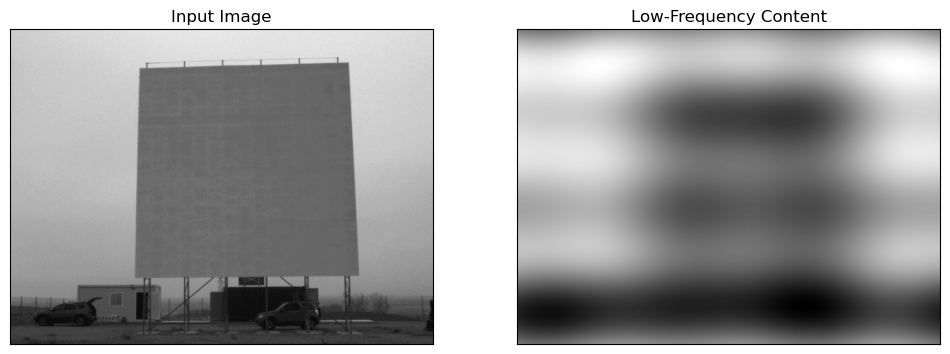

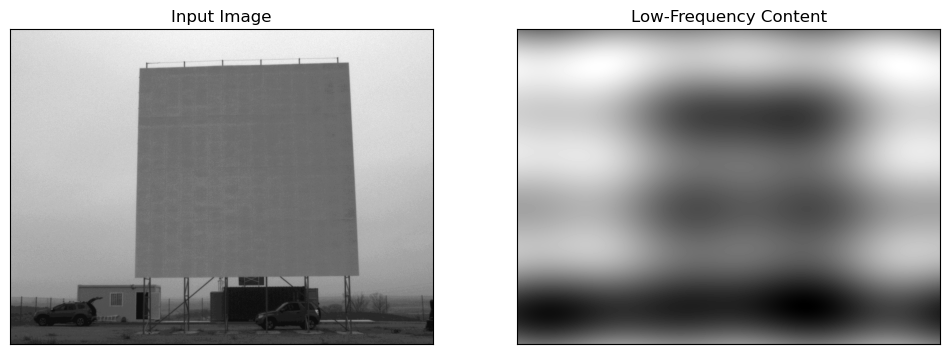

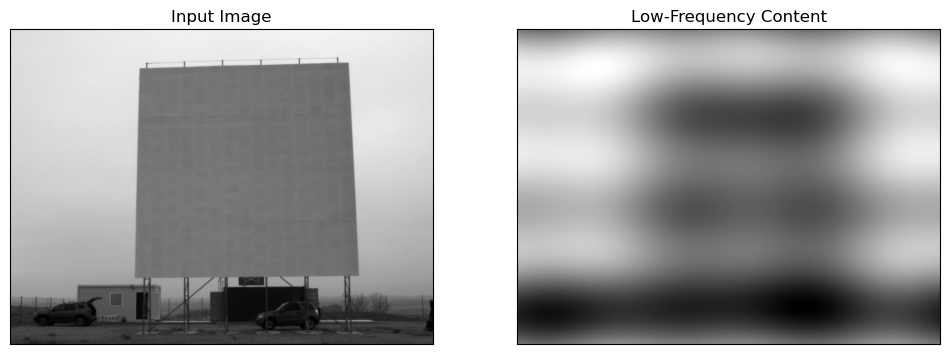

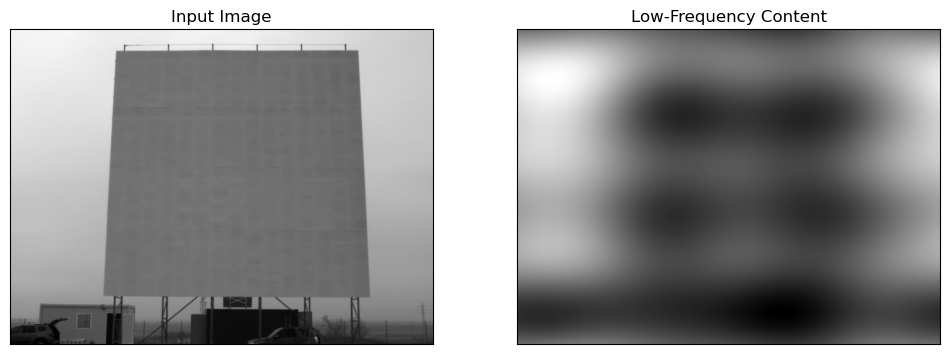

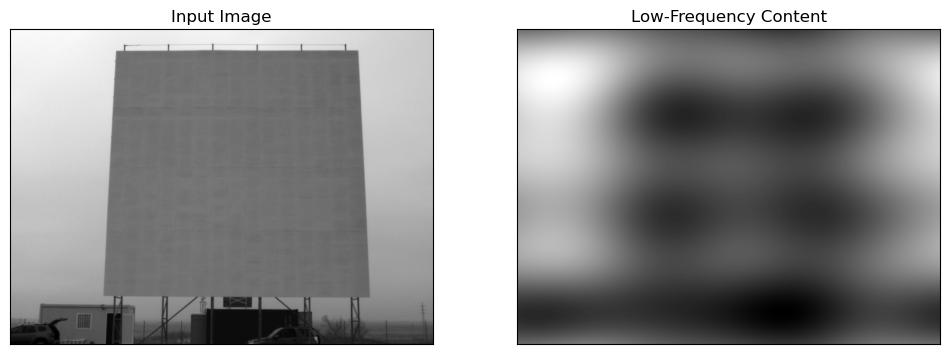

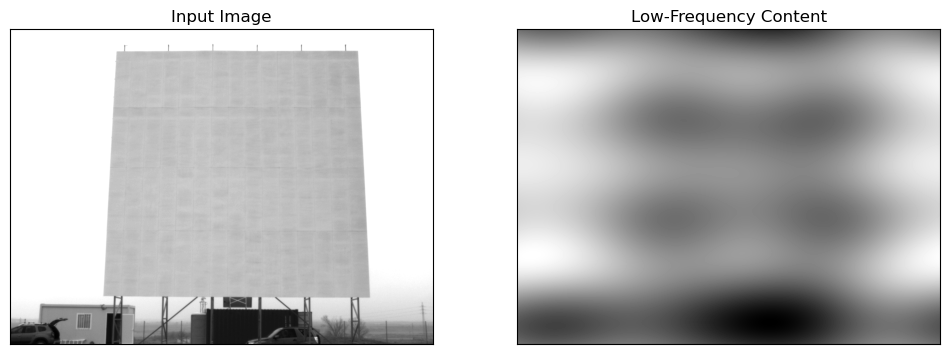

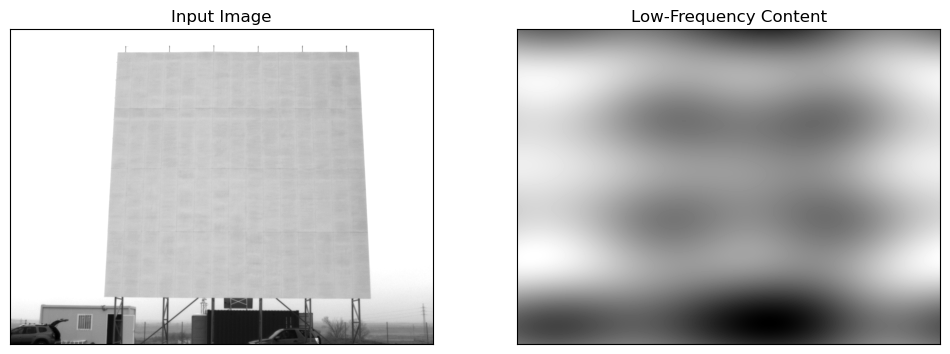

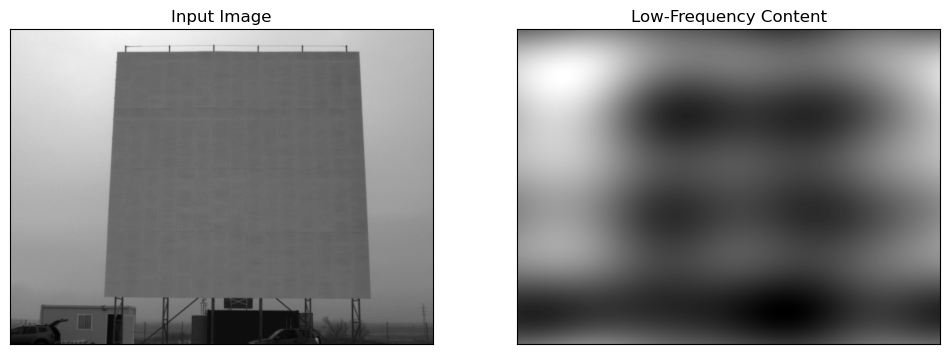

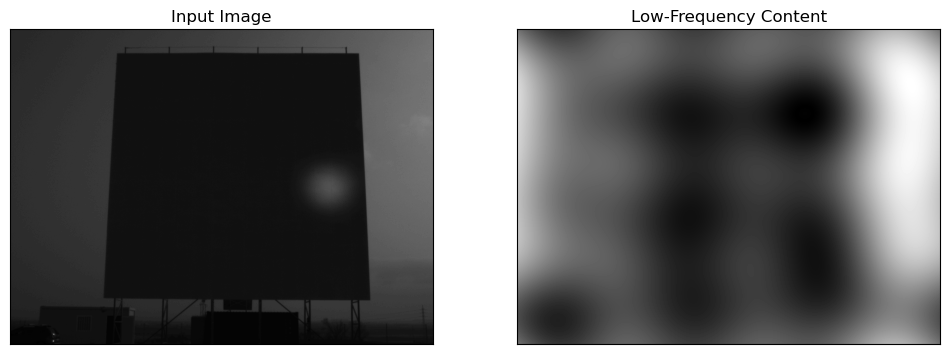

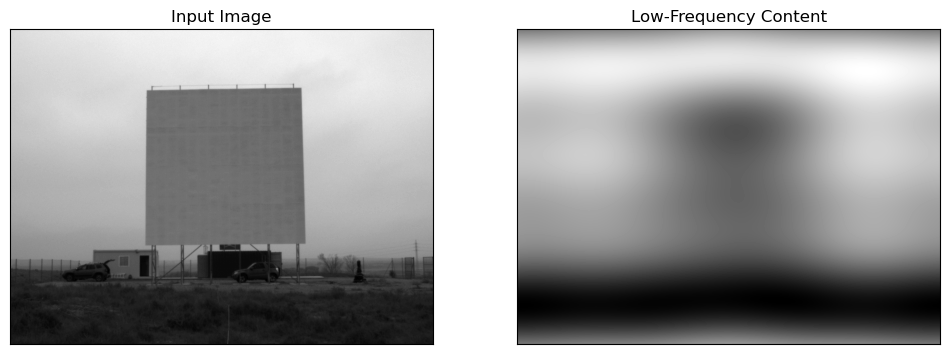

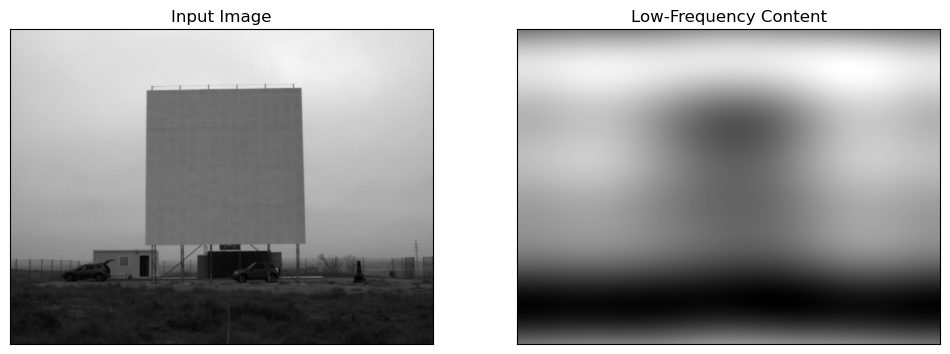

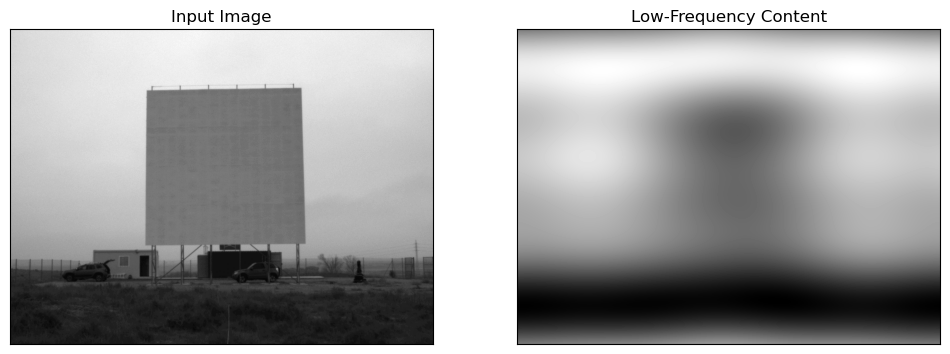

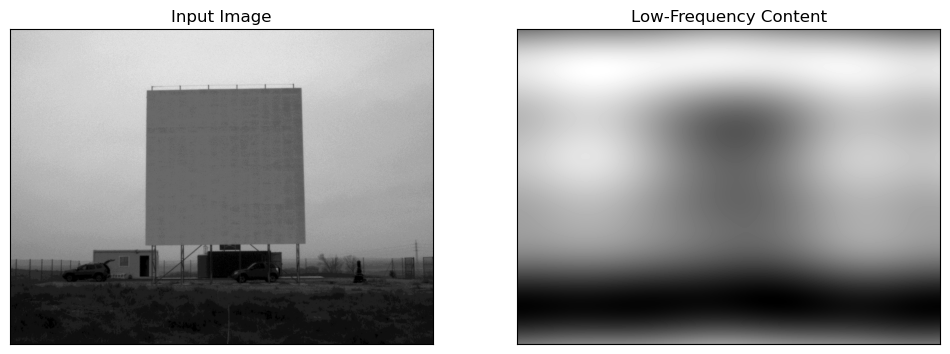

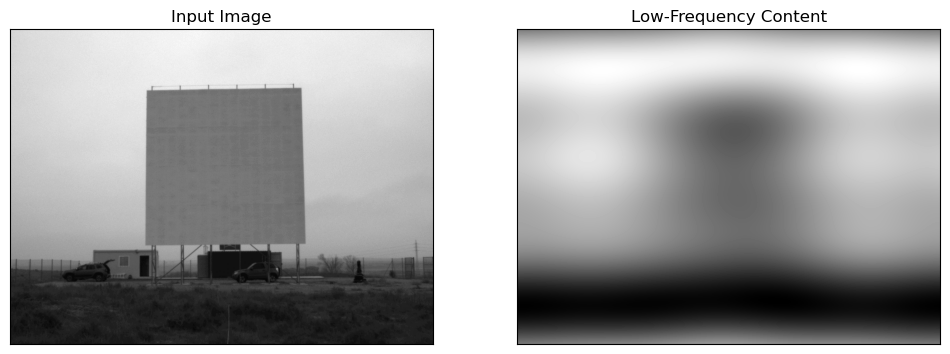

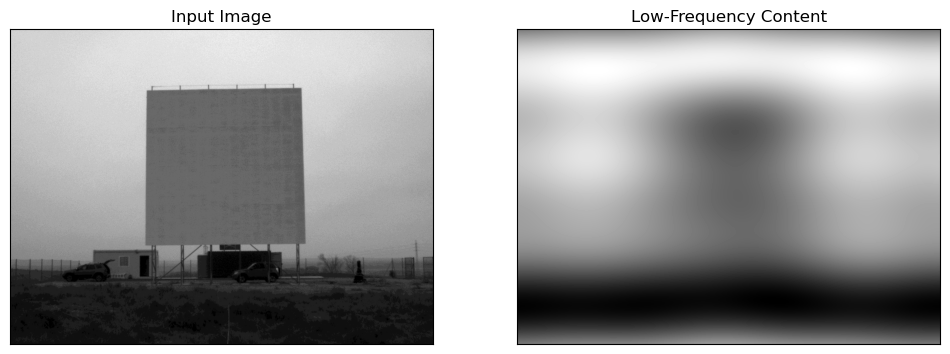

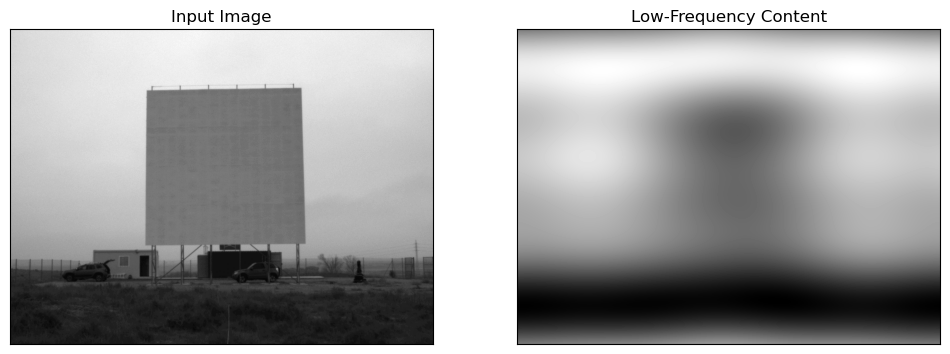

: 

In [ ]:
data_date_folder = r'C:\Users\qzheng\OneDrive - NREL\BCS Comparison\CENER\data\raw_input\raw_input\CAT\04_03_2021\images\Images_1'
# data_files = data_name_dict[data_date_folder]
data_files = glob(os.path.join(data_date_folder, data_format))

for data_file in data_files:
    _img = cv2.imread(data_file, cv2.IMREAD_GRAYSCALE)
    
    # Compute the 2D FFT of the image
    f = np.fft.fft2(_img)
    fshift = np.fft.fftshift(f)

    # Create a mask to keep only the low-frequency components
    rows, cols = _img.shape
    crow, ccol = rows // 2 , cols // 2  # center
    mask = np.zeros((rows, cols), np.uint8)
    r = 3  # radius of the low-frequency region to keep
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
    mask[mask_area] = 1

    # Apply the mask to the shifted FFT
    fshift_low_freq = fshift * mask

    # Perform the inverse FFT to reconstruct the image
    f_ishift = np.fft.ifftshift(fshift_low_freq)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Plot the original and reconstructed images
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(_img, cmap='gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_back, cmap='gray')
    plt.title('Low-Frequency Content'), plt.xticks([]), plt.yticks([])
    plt.show()

